# Prompt Chaining in Langgaraph

In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv


In [2]:
load_dotenv()

True

In [3]:
model = ChatOpenAI(model="gpt-4o-mini")

In [21]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str
    evaluation: str

In [11]:
def generate_outline(state: BlogState) -> BlogState:
    title = state["title"]
    prompt = f"Generate an outline for a blog post about {title}"
    outline = model.invoke(prompt).content
    state["outline"] = outline
    return state

In [12]:
def generate_content(state: BlogState) -> BlogState:
    outline = state["outline"]
    prompt = f"Generate a blog post based on the following outline: {outline}"
    content = model.invoke(prompt).content
    state["content"] = content
    return state

    

In [13]:
def evaluate_content(state: BlogState) -> BlogState:
    title = state["title"]
    outline = state["outline"]
    content = state["content"]
    prompt = f"Evaluate the following blog post: {content} based on the following outline: {outline} and the following title: {title} and return a score between 0 and 10"
    evaluation = model.invoke(prompt).content
    state["evaluation"] = evaluation
    return state


In [14]:
graph = StateGraph(BlogState)

graph.add_node("Generate_outline", generate_outline)
graph.add_node("Generate_content", generate_content)
graph.add_node("Evaluate_content", evaluate_content)


graph.add_edge(START, "Generate_outline")
graph.add_edge("Generate_outline", "Generate_content")
graph.add_edge("Generate_content", "Evaluate_content")
graph.add_edge("Evaluate_content", END)

workflow = graph.compile()

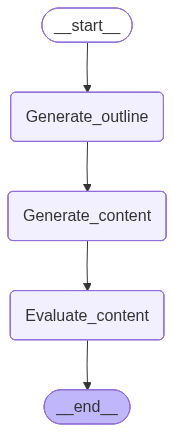

In [15]:
workflow

In [16]:
inital_state = {"title": "The Future of AI"}
final_state = workflow.invoke(inital_state)
print(final_state)

{'title': 'The Future of AI', 'outline': "### Blog Post Outline: The Future of AI\n\n#### Introduction\n- Brief overview of AI development to date\n- Importance of discussing the future of AI\n- Purpose of the blog post\n\n#### 1. Current Trends in AI\n   - Advancements in machine learning and deep learning\n   - Growth of natural language processing capabilities\n   - Expansion of AI applications in various industries (healthcare, finance, education, etc.)\n\n#### 2. Predictions for AI in the Next Decade\n   - Expected technological advancements\n     - Improved algorithms and models\n     - Increased processing power\n   - Integration of AI in everyday life\n   - Potential breakthroughs in general AI\n\n#### 3. Ethical Considerations\n   - The impact of AI on employment and job markets\n   - Addressing biases in AI algorithms\n   - The importance of developing ethical AI guidelines\n\n#### 4. AI and Society\n   - How AI will change human-computer interactions\n   - The role of AI in 

In [22]:
print(final_state['outline'])


### Blog Post Outline: The Future of AI

#### Introduction
- Brief overview of AI development to date
- Importance of discussing the future of AI
- Purpose of the blog post

#### 1. Current Trends in AI
   - Advancements in machine learning and deep learning
   - Growth of natural language processing capabilities
   - Expansion of AI applications in various industries (healthcare, finance, education, etc.)

#### 2. Predictions for AI in the Next Decade
   - Expected technological advancements
     - Improved algorithms and models
     - Increased processing power
   - Integration of AI in everyday life
   - Potential breakthroughs in general AI

#### 3. Ethical Considerations
   - The impact of AI on employment and job markets
   - Addressing biases in AI algorithms
   - The importance of developing ethical AI guidelines

#### 4. AI and Society
   - How AI will change human-computer interactions
   - The role of AI in enhancing global communication
   - Privacy concerns and data securi

In [23]:
print(final_state['content'])


# The Future of AI: Navigating the Path Ahead

## Introduction

Artificial Intelligence (AI) is at a pivotal moment in its evolution. Over the past few decades, we’ve witnessed remarkable advancements—from basic algorithmic models to sophisticated systems capable of understanding and generating human language. As AI continues to permeate our daily lives, it becomes increasingly important to discuss its future implications, opportunities, and challenges. This blog post aims to explore the various facets of AI's trajectory and engage readers in contemplating the essential questions surrounding this transformative technology.

## 1. Current Trends in AI

AI is currently experiencing a surge in growth, driven by significant advancements in machine learning and deep learning. These developments have thrust algorithms into a new realm of capability, enhancing their ability to learn from vast data sets and make predictions. 

Natural language processing (NLP) has also reached new heights, ena

In [24]:
print(final_state['evaluation'])

I would evaluate the blog post titled "The Future of AI: Navigating the Path Ahead" as follows:

### Evaluation:

**Content and Structure (Score: 8/10):**
The post is well-structured and follows the outlined topics systematically. It mentions current trends, predictions, ethical considerations, and societal implications, providing a comprehensive view of AI's landscape. The sections are clear and relevant, making it easy for readers to follow the author's line of thought. 

**Depth of Analysis (Score: 7/10):**
The blog post touches on many important facets of AI, including opportunities and challenges. However, it could benefit from more in-depth analysis in certain areas, particularly regarding nuanced ethical concerns related to AI biases and employment. Including specific case studies or examples could enhance the depth of the discussion.

**Clarity and Engagement (Score: 9/10):**
The writing is clear and engaging, making complex topics accessible to a wide audience. The use of term